#🌟**Spam Email Detection Project**

#EDA and Preprocessing:

# 1) Importing Libraries:

In [1]:
#import functions
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pylab as plt
import seaborn as sns
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
from scipy import stats
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn import tree, svm
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import ElasticNet
import pandas as pd
from google.colab import files
import io
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


#2) Reading Dataset:

In [2]:
#reading dataset
spamdata = pd.read_csv('/content/spam_ham_dataset.csv', engine='python')

# 3) Shape of Dataset:

In [3]:
# display num of columns and rows
print(spamdata.shape)
#data has 5171 rows and 4 columns

(5171, 4)


#4) Overview of the whole Project:

In [4]:
#display first 5 rows
spamdata.head()

,# sent emails,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [5]:
#display last 5 rows of data
spamdata.tail()

,# sent emails,label,text,label_num
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0
5170,4807,spam,Subject: important online banking alert\r\ndea...,1


In [6]:
#print names of columns
spamdata.columns

Index(['# sent emails ', 'label', 'text', 'label_num'], dtype='object')

In [7]:
# display types of data in columns
spamdata.dtypes

# sent emails      int64
label             object
text              object
label_num          int64
dtype: object

In [8]:
# display info of columns
spamdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   # sent emails   5171 non-null   int64 
 1   label           5171 non-null   object
 2   text            5171 non-null   object
 3   label_num       5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [9]:
#Checking class distribution
spamdata['label'].value_counts()

label
ham     3672
spam    1499
Name: count, dtype: int64

# Visualization of data

<Axes: xlabel='label', ylabel='count'>

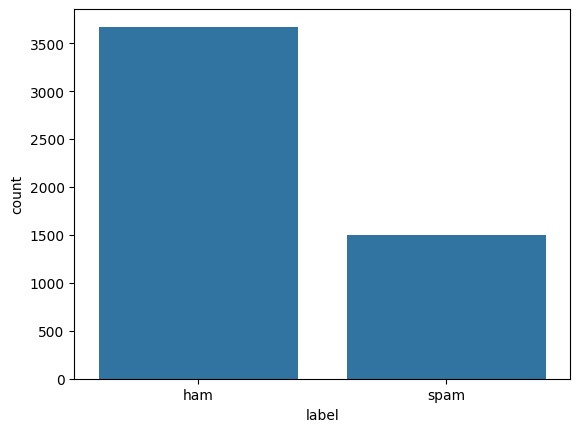

In [10]:
# display counts of label in graph
sns.countplot(x = "label", data = spamdata)

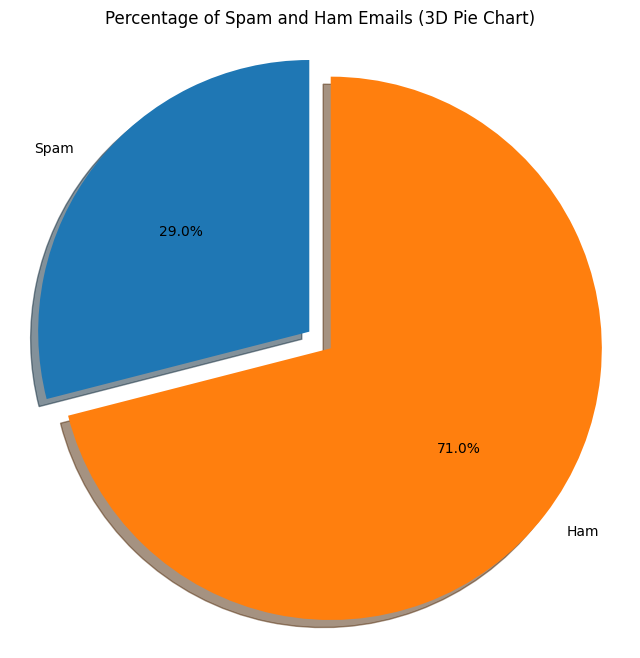

In [11]:
# Get the counts of spam and ham emails
spam_count = spamdata[spamdata['label'] == 'spam'].shape[0]
ham_count = spamdata[spamdata['label'] == 'ham'].shape[0]

total_emails = spam_count + ham_count
spam_percent = (spam_count / total_emails) * 100
ham_percent = (ham_count / total_emails) * 100

plt.figure(figsize=(8, 8))
plt.pie([spam_percent, ham_percent], labels=['Spam', 'Ham'], autopct='%1.1f%%', startangle=90, shadow=True, explode=(0.1, 0))

plt.title('Percentage of Spam and Ham Emails (3D Pie Chart)')
plt.axis('equal')  # Equal aspect ratio ensures a circular pie

plt.show()


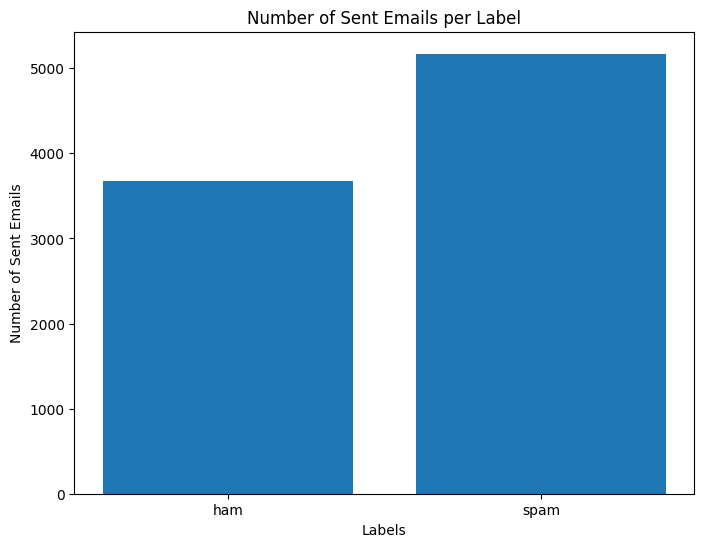

In [12]:
# Bar plot for 'sent_emails'
plt.figure(figsize=(8, 6))
plt.bar(spamdata['label'], spamdata['# sent emails '])
plt.xlabel('Labels')
plt.ylabel('Number of Sent Emails')
plt.title('Number of Sent Emails per Label')
plt.show()

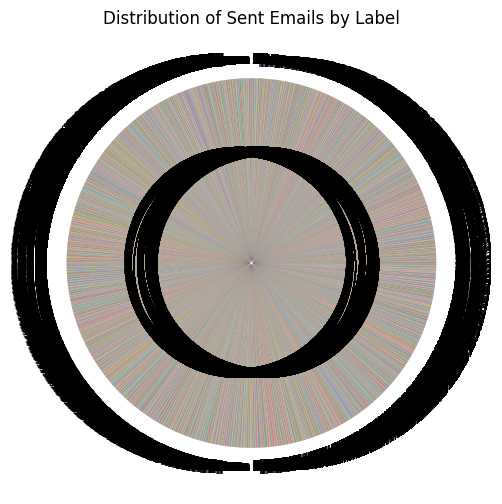

In [13]:
# Pie chart for 'sent_emails'
plt.figure(figsize=(8, 6))
plt.pie(spamdata['# sent emails '], labels=spamdata['label'], autopct='%1.1f%%')
plt.title('Distribution of Sent Emails by Label')
plt.show()

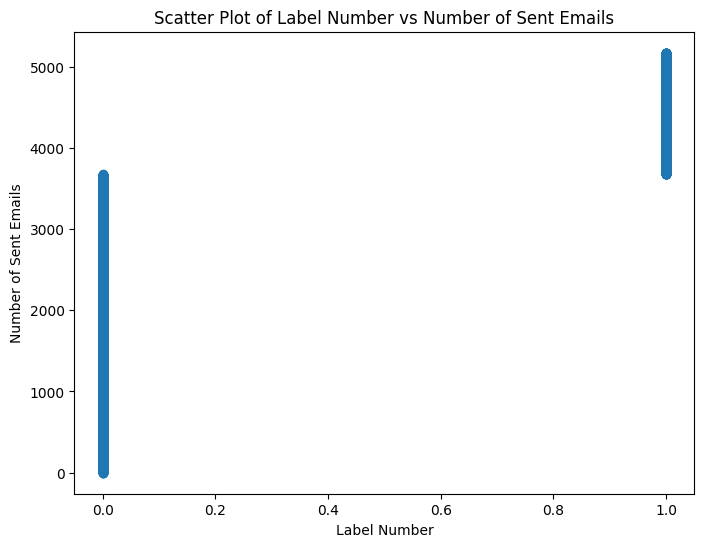

In [14]:
# Scatter plot for 'label_num' vs 'sent_emails'
plt.figure(figsize=(8, 6))
plt.scatter(spamdata['label_num'], spamdata['# sent emails '])
plt.xlabel('Label Number')
plt.ylabel('Number of Sent Emails')
plt.title('Scatter Plot of Label Number vs Number of Sent Emails')
plt.show()

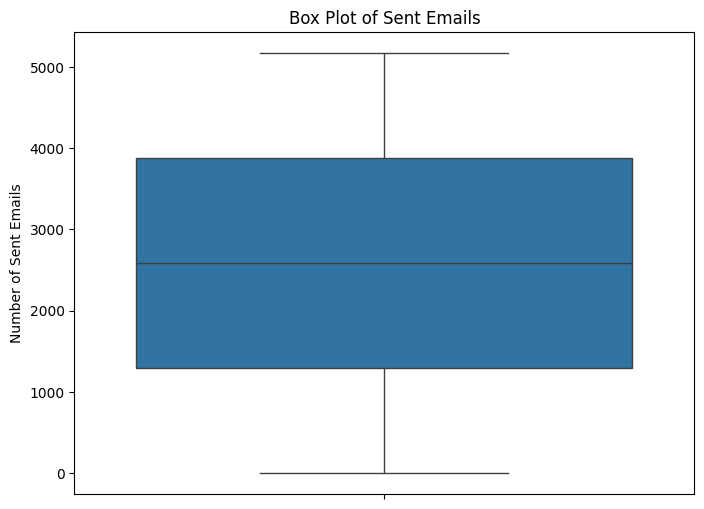

In [15]:
# Box plot for 'sent_emails'
plt.figure(figsize=(8, 6))
sns.boxplot(y=spamdata['# sent emails '])
plt.ylabel('Number of Sent Emails')
plt.title('Box Plot of Sent Emails')
plt.show()

 # 5) Checking Null Values:

In [16]:
#display sum of null values in every column
spamdata.isna().sum()
# data does not contain nulls

# sent emails     0
label             0
text              0
label_num         0
dtype: int64

# 6) CHECK DUBLICATES

In [17]:
#drop dublicates in rows
spamdata.drop_duplicates(inplace=True)
# there are no dublicates in data

# 7) CKECKING OUTLIERS

In [18]:
q1 = np.percentile(spamdata['# sent emails '], 25)
q3 = np.percentile(spamdata['# sent emails '], 75)
norm_range = (q3 - q1) * 1.5
lower_outliers = spamdata[spamdata['# sent emails '] < (q1 - norm_range)]
upper_outliers = spamdata[spamdata['# sent emails '] > (q3 + norm_range)]
outliers = len(lower_outliers)+len(upper_outliers)
print(f"The number of outliers in : {outliers}")
# there are not outliers in sent emails column( in data general)

The number of outliers in : 0


# 8) ENCODING Label Column

In [19]:
#print all datatypes of objects
spamdata.select_dtypes(include=['object']).columns

Index(['label', 'text'], dtype='object')

In [20]:
#Doing encoding to column label
spamdata['label'] = spamdata['label'].map({'ham': 0, 'spam': 1})

In [21]:
# display types of data
spamdata.dtypes

# sent emails      int64
label              int64
text              object
label_num          int64
dtype: object

In [22]:
# print first 10 rows of data
spamdata.head(10)

,# sent emails,label,text,label_num
0,605,0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,0,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,0,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,1,"Subject: photoshop , windows , office . cheap ...",1
4,2030,0,Subject: re : indian springs\r\nthis deal is t...,0
5,2949,0,Subject: ehronline web address change\r\nthis ...,0
6,2793,0,Subject: spring savings certificate - take 30 ...,0
7,4185,1,Subject: looking for medication ? we ` re the ...,1
8,2641,0,Subject: noms / actual flow for 2 / 26\r\nwe a...,0
9,1870,0,"Subject: nominations for oct . 21 - 23 , 2000\...",0


# 9) Cleaning text column

In [23]:
#print stopwords of column text
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [24]:
#find punctuations in text column
# Extract punctuation using list comprehension
punctuation = [''.join(set(c for c in row['text'] if not c.isalnum())) for index, row in spamdata.iterrows()]
print(punctuation)

["}{';\n,\r.#/ :", ':)-\n\r.( ,', "!':)-\n\r.( ,", ':\n\r. ,', "'\n,\r. :", '")\n,\r.(/ :', "!%'-\n,\r./ :", '!%)-\n`\r,.?/ :', '"@=-\n,\r./ :', ':)-\n\r.( ,', "%$');-\n,\r.(/ :", '!\n,\r.? :', ':;\n\r./ ,', ' \n\r.^:', '$:\n\r. ,', "!@|')-\n,\r.(/ :", "%@'-\n,\r.#/ :", '@)-\n,\r.(/ :', '@-\n,\r./ :', "')-\n,\r.(/ :", '%@)-\n,\r.(/ :', "!$':-\n\r./ ,", ':)-\n\r.( ,', '$\n,\r./ :', "!%|':);-\n?\r.(/ ,", '@:;)-\n\r.#(/ ,', '"!@*\')+-\n,\r?.(/ :', '\n\r. :', "@')-\n,\r.(/ :", '!@}{;-\n,\r.#/ :', "@'$-\n,\r.?/ :", ':;\n\r./ ,', '!;-\n,\r.? :', '"@\')-\n,\r?.(/ :', '&"=}{\';)-\n,\r.#/ :', '"!@*$)+-\n,\r.#(/ :', ':\n\r./ ,', '-\n\r. :', '@_)-\n\r.(/ :', "@*')-\n,\r>.<(/ :", '!%*:\n\r./ ,', '!\n,\r. :', '-\n>\r,. :', ':;\n\r./ ,', "&@':\n\r.?/ ,", '%@$)-\n,\r.#(/ :', "&!=_$'-\n,\r.?/ :", "':-\n>\r. ,", "!')-\n,\r.( :", '-\n>.:"!_]?/ [,%\';(@)\r', '@_$[)]-\n,\r.#( :', ':\n\r. ,', '\n,\r./ :', '"\':;-\n\r. ,', '&)\x01\n,\r.(?/ :', "'\n,\r.#/ :", "'$;-\n,\r.?/ :", ':;-\n\r./ ,', '"@=\n,\r./ :', 

In [25]:
def process_text(text):
    text = text.replace("Subject:", "")
    # Remove punctuation
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)

    # Remove stopwords
    clean_words = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

    # Remove backslashes
    clean_words = [word.replace("\\", "") for word in clean_words]

    return clean_words


In [26]:
#  Apply the process_text function to the 'text' column
spamdata['text'] = spamdata['text'].apply(process_text)
spamdata.head()


,# sent emails,label,text,label_num
0,605,0,"[enron, methanol, meter, 988291, follow, note,...",0
1,2349,0,"[hpl, nom, january, 9, 2001, see, attached, fi...",0
2,3624,0,"[neon, retreat, ho, ho, ho, around, wonderful,...",0
3,4685,1,"[photoshop, windows, office, cheap, main, tren...",1
4,2030,0,"[indian, springs, deal, book, teco, pvr, reven...",0


In [27]:
# Join the list of words back into a single string
spamdata['text'] = spamdata['text'].apply(lambda x: ' '.join(x))
spamdata.head()

,# sent emails,label,text,label_num
0,605,0,enron methanol meter 988291 follow note gave m...,0
1,2349,0,hpl nom january 9 2001 see attached file hplno...,0
2,3624,0,neon retreat ho ho ho around wonderful time ye...,0
3,4685,1,photoshop windows office cheap main trending a...,1
4,2030,0,indian springs deal book teco pvr revenue unde...,0


# Normalization (STEEMING) (NLP)

In [28]:
### reducing words to their base form
# Create a PorterStemmer object
stemmer = PorterStemmer()

# Apply stemming to the 'text' column
spamdata['text'] = spamdata['text'].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))
spamdata.head(10)


,# sent emails,label,text,label_num
0,605,0,enron methanol meter 988291 follow note gave m...,0
1,2349,0,hpl nom januari 9 2001 see attach file hplnol ...,0
2,3624,0,neon retreat ho ho ho around wonder time year ...,0
3,4685,1,photoshop window offic cheap main trend abas d...,1
4,2030,0,indian spring deal book teco pvr revenu unders...,0
5,2949,0,ehronlin web address chang messag intend ehron...,0
6,2793,0,spring save certif take 30 save 30 use custom ...,0
7,4185,1,look medic best sourc difficult make materi co...,1
8,2641,0,nom actual flow 2 26 agre forward melissa jone...,0
9,1870,0,nomin oct 21 23 2000 see attach file hplnl 021...,0


In [29]:
#display sum of null values in every column after cleaning text column
spamdata.isna().sum()
# Data also does not contain nulls

# sent emails     0
label             0
text              0
label_num         0
dtype: int64

#Try Doing tokens to text columns(NLP)

In [30]:
# import nltk
# from nltk.tokenize import word_tokenize

# # Download NLTK resources (only need to do this once)
# nltk.download('punkt')

# # Tokenize the text column
# spamdata['tokens'] = spamdata['text'].apply(word_tokenize)


In [31]:
# from collections import Counter

# # Count the frequency of words
# word_counts = Counter()
# for tokens in spamdata['tokens']:
#     word_counts.update(tokens)

# # Print the most common words
# print(word_counts.most_common(50))
###########################output#########################################
# [('ect', 13908), ('hou', 7289), ('enron', 6555), ('2000', 4386), ('com', 3709), ('deal', 3655), ('pleas', 3243), ('ga', 3072), ('3', 2922), ('subject', 2893), ('1', 2743), ('meter', 2721), ('00', 2404), ('cc', 2391), ('2', 2379), ('pm', 2343), ('hpl', 2318), ('thank', 2304), ('000', 2127), ('10', 2113), ('need', 2081), ('2001', 2028), ('e', 1969), ('daren', 1901), ('forward', 1832), ('price', 1813), ('01', 1794), ('corp', 1776), ('volum', 1691), ('know', 1618), ('0', 1586), ('4', 1577), ('5', 1565), ('day', 1549), ('get', 1503), ('11', 1440), ('new', 1435), ('compani', 1429), ('mmbtu', 1408), ('product', 1403), ('may', 1382), ('chang', 1354), ('12', 1345), ('j', 1336), ('inform', 1296), ('http', 1242), ('see', 1228), ('03', 1222), ('attach', 1195), ('nom', 1186)]

In [32]:
# tokens_column = spamdata['tokens']

# # Convert non-string elements to strings
# for i in range(len(tokens_column)):
#     if not isinstance(tokens_column[i], str):
#         tokens_column[i] = str(tokens_column[i])

# # Verify the conversion
# for token in tokens_column:
#     if not isinstance(token, str):
#         print("Non-string element found after conversion:", token)


In [33]:
spamdata.head()

,# sent emails,label,text,label_num
0,605,0,enron methanol meter 988291 follow note gave m...,0
1,2349,0,hpl nom januari 9 2001 see attach file hplnol ...,0
2,3624,0,neon retreat ho ho ho around wonder time year ...,0
3,4685,1,photoshop window offic cheap main trend abas d...,1
4,2030,0,indian spring deal book teco pvr revenu unders...,0


#Print most repeated words in spam and ham subjects

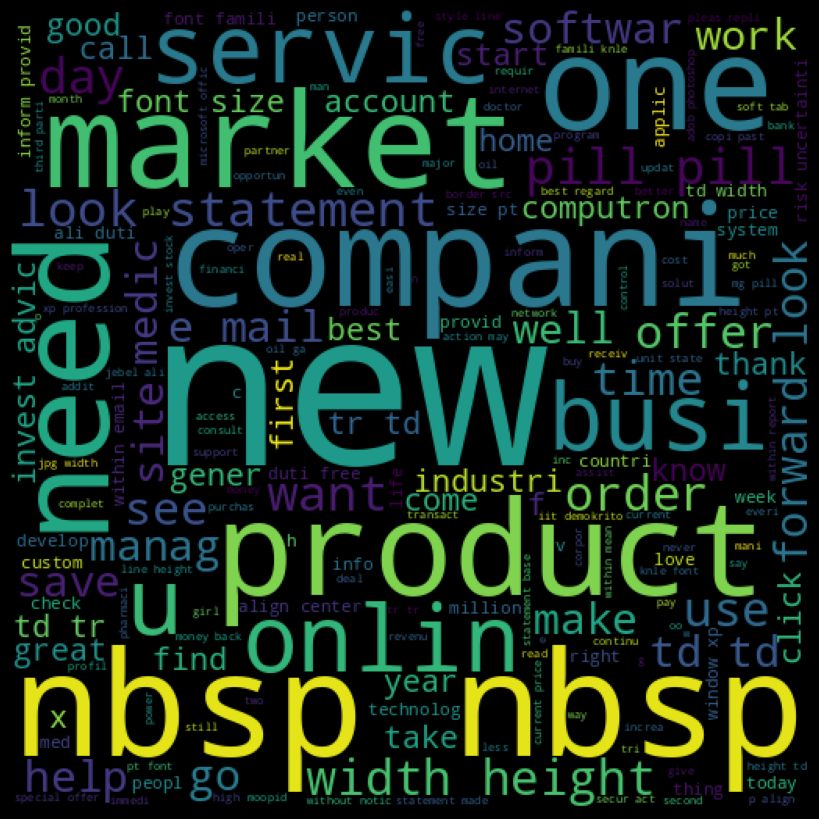

In [34]:
#Wordcloud of spam mails
from wordcloud import WordCloud
spam_words = ''.join(list(spamdata[spamdata['label']==1]['text']))
spam_wordclod = WordCloud(width = 512,height = 512).generate(spam_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(spam_wordclod)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

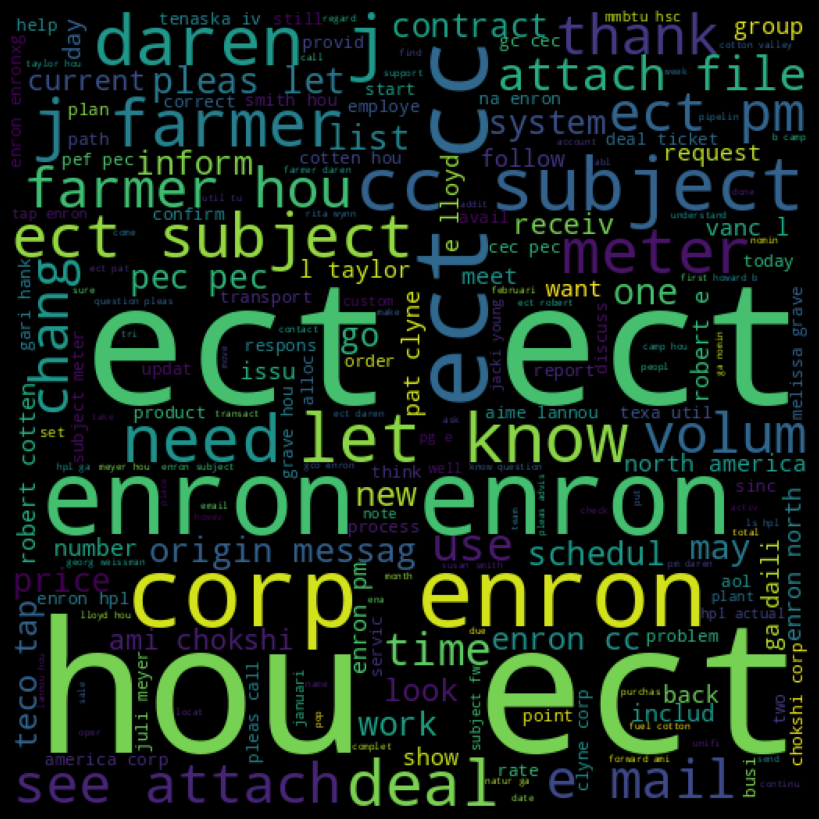

In [35]:
#Wordcloud of ham mails
from wordcloud import WordCloud
spam_words = ''.join(list(spamdata[spamdata['label']==0]['text']))
spam_wordclod = WordCloud(width = 512,height = 512).generate(spam_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(spam_wordclod)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

#Get length of every subject and graph it

In [36]:
"""
  This function calculates the length of the text string.
"""
def calculate_subject_length(text):
  return len(text)

spamdata['length'] = spamdata['text'].apply(calculate_subject_length)

spamdata.head(20)


,# sent emails,label,text,label_num,length
0,605,0,enron methanol meter 988291 follow note gave m...,0,204
1,2349,0,hpl nom januari 9 2001 see attach file hplnol ...,0,64
2,3624,0,neon retreat ho ho ho around wonder time year ...,0,1278
3,4685,1,photoshop window offic cheap main trend abas d...,1,334
4,2030,0,indian spring deal book teco pvr revenu unders...,0,165
5,2949,0,ehronlin web address chang messag intend ehron...,0,250
6,2793,0,spring save certif take 30 save 30 use custom ...,0,1279
7,4185,1,look medic best sourc difficult make materi co...,1,447
8,2641,0,nom actual flow 2 26 agre forward melissa jone...,0,322
9,1870,0,nomin oct 21 23 2000 see attach file hplnl 021...,0,62


In [37]:
#Lets check if email length is coorelated to spam/ham
spamdata['length'] = spamdata['text'].map(lambda text: len(text))

spamdata.groupby('label').length.describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0,3672.0,569.927832,827.525438,5.0,136.0,301.0,705.25,20344.0
1,1499.0,799.353569,1274.289647,0.0,168.5,359.0,793.00,19475.0


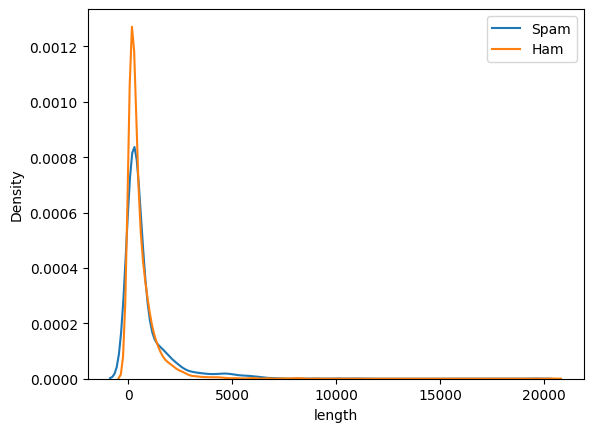

In [38]:
# show the Kernel Density Estimate
sns.kdeplot(spamdata[spamdata["label"]==1]["length"], label="Spam")
sns.kdeplot(spamdata[spamdata["label"]==0]["length"], label="Ham")
plt.legend()

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

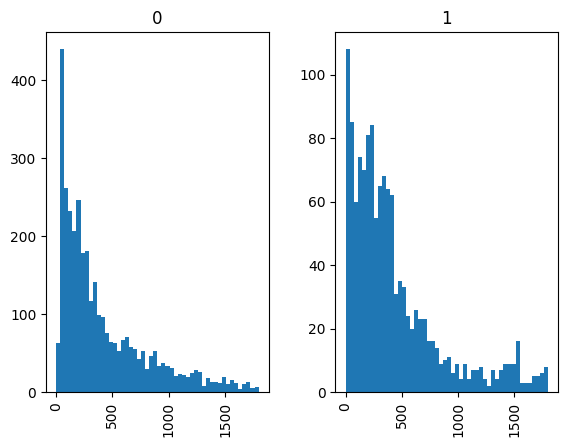

In [39]:
#emails length have some extreme outliers, lets set a length threshold & check length distribution
emails_subset = spamdata[spamdata.length < 1800]
emails_subset.hist(column='length', by='label', bins=50)


                # sent emails      label  label_num    length
# sent emails         1.000000  0.785847   0.785847  0.084883
label                 0.785847  1.000000   1.000000  0.105832
label_num             0.785847  1.000000   1.000000  0.105832
length                0.084883  0.105832   0.105832  1.000000
------------------------------


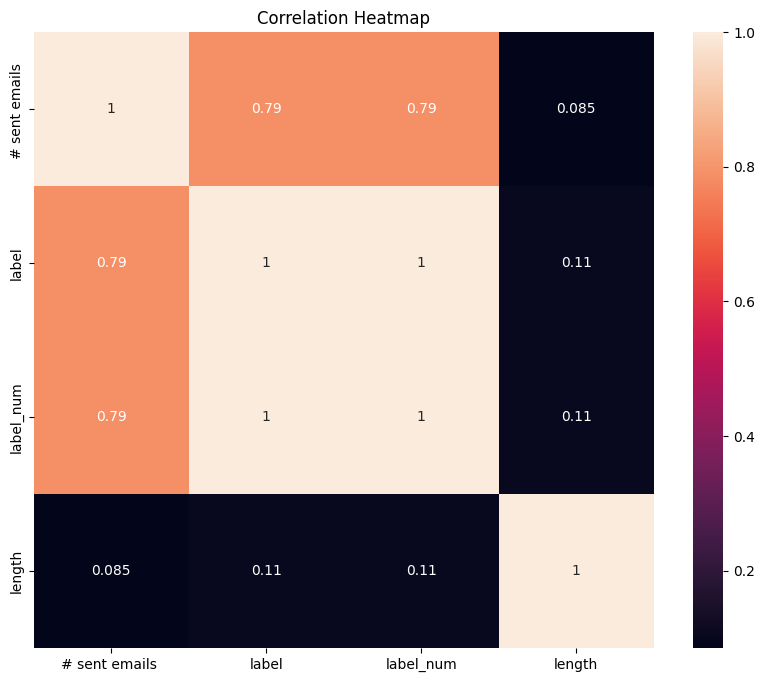

In [40]:
# Compute the correlation matrix
correlation_matrix = spamdata.drop(columns=['text']).corr()

# Print or use the correlation matrix as needed
print(correlation_matrix)
print("-" * 30)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Heatmap')
plt.show()
# there is a bad corr between label and length of text
#and strong corr between label and # sent emails

In [41]:
# Create a new column representing the product of length and # send emails
spamdata['length_times_emails'] = spamdata['length'] * spamdata['# sent emails ']
spamdata.dtypes


# sent emails           int64
label                   int64
text                   object
label_num               int64
length                  int64
length_times_emails     int64
dtype: object

In [42]:
# convert to integer
spamdata['length_times_emails'] = spamdata['length_times_emails'].astype(int)

spamdata.head(20)

,# sent emails,label,text,label_num,length,length_times_emails
0,605,0,enron methanol meter 988291 follow note gave m...,0,204,123420
1,2349,0,hpl nom januari 9 2001 see attach file hplnol ...,0,64,150336
2,3624,0,neon retreat ho ho ho around wonder time year ...,0,1278,4631472
3,4685,1,photoshop window offic cheap main trend abas d...,1,334,1564790
4,2030,0,indian spring deal book teco pvr revenu unders...,0,165,334950
5,2949,0,ehronlin web address chang messag intend ehron...,0,250,737250
6,2793,0,spring save certif take 30 save 30 use custom ...,0,1279,3572247
7,4185,1,look medic best sourc difficult make materi co...,1,447,1870695
8,2641,0,nom actual flow 2 26 agre forward melissa jone...,0,322,850402
9,1870,0,nomin oct 21 23 2000 see attach file hplnl 021...,0,62,115940


                     # sent emails      label  label_num    length  \
# sent emails              1.000000  0.785847   0.785847  0.084883   
label                      0.785847  1.000000   1.000000  0.105832   
label_num                  0.785847  1.000000   1.000000  0.105832   
length                     0.084883  0.105832   0.105832  1.000000   
length_times_emails        0.342483  0.307166   0.307166  0.878844   

                     length_times_emails  
# sent emails                   0.342483  
label                           0.307166  
label_num                       0.307166  
length                          0.878844  
length_times_emails             1.000000  
------------------------------


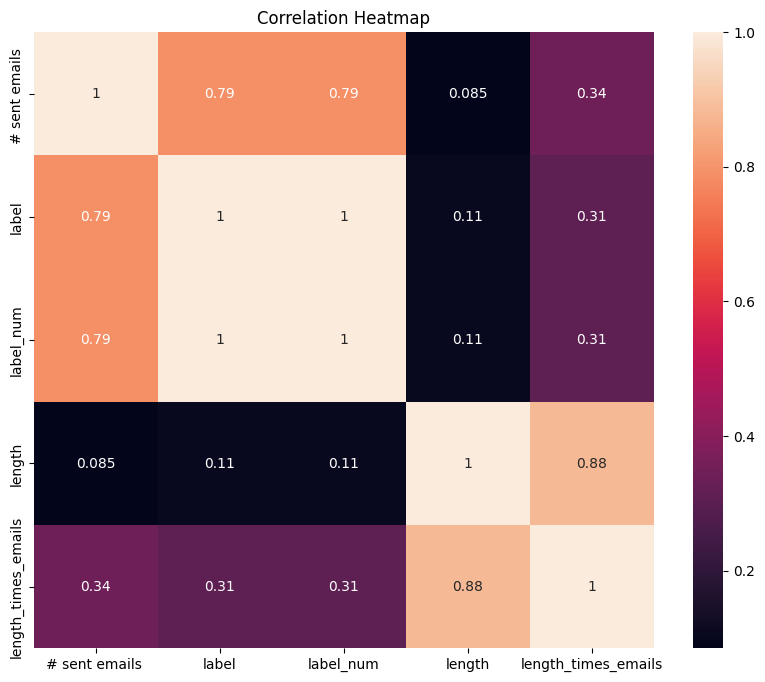

In [43]:
# Compute the correlation matrix
correlation_matrix = spamdata.drop(columns=['text']).corr()

# Print or use the correlation matrix as needed
print(correlation_matrix)
print("-" * 30)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Heatmap')
plt.show()
# a moderate positive linear relationship between the length_times_emails and label

In [44]:
# check outliers in length_times_emails
q1 = np.percentile(spamdata['length_times_emails'], 25)
q3 = np.percentile(spamdata['length_times_emails'], 75)
norm_range = (q3 - q1) * 1.5
lower_outliers = spamdata[spamdata['length_times_emails'] < (q1 - norm_range)]
upper_outliers = spamdata[spamdata['length_times_emails'] > (q3 + norm_range)]
outliers = len(lower_outliers)+len(upper_outliers)
print(f"The number of outliers in : {outliers}")
# there are not outliers in sent emails column( in data general)

The number of outliers in : 527


In [45]:
#replace outliers in length_times_emails with min, max
q1 = np.percentile(spamdata['length_times_emails'], 25)
q3 = np.percentile(spamdata['length_times_emails'], 75)
norm_range = (q3 - q1) * 1.5

# Define minimum and maximum bounds
lower_bound = q1 - norm_range
upper_bound = q3 + norm_range

# Replace outliers with min and max values
spamdata['length_times_emails'] = np.clip(spamdata['length_times_emails'], lower_bound, upper_bound)

# (Optional) Print the number of outliers replaced
outliers_replaced = len(spamdata[spamdata['length_times_emails'] == lower_bound]) + \
                   len(spamdata[spamdata['length_times_emails'] == upper_bound])
print(f"Number of outliers replaced: {outliers_replaced}")


Number of outliers replaced: 527


In [46]:
q1 = np.percentile(spamdata['length_times_emails'], 25)
q3 = np.percentile(spamdata['length_times_emails'], 75)
norm_range = (q3 - q1) * 1.5
lower_outliers = spamdata[spamdata['length_times_emails'] < (q1 - norm_range)]
upper_outliers = spamdata[spamdata['length_times_emails'] > (q3 + norm_range)]
outliers = len(lower_outliers)+len(upper_outliers)
print(f"The number of outliers in : {outliers}")
# there are not outliers in sent emails column( in data general)

The number of outliers in : 0


                     # sent emails      label  label_num    length  \
# sent emails              1.000000  0.785847   0.785847  0.084883   
label                      0.785847  1.000000   1.000000  0.105832   
label_num                  0.785847  1.000000   1.000000  0.105832   
length                     0.084883  0.105832   0.105832  1.000000   
length_times_emails        0.492043  0.369783   0.369783  0.658035   

                     length_times_emails  
# sent emails                   0.492043  
label                           0.369783  
label_num                       0.369783  
length                          0.658035  
length_times_emails             1.000000  
------------------------------


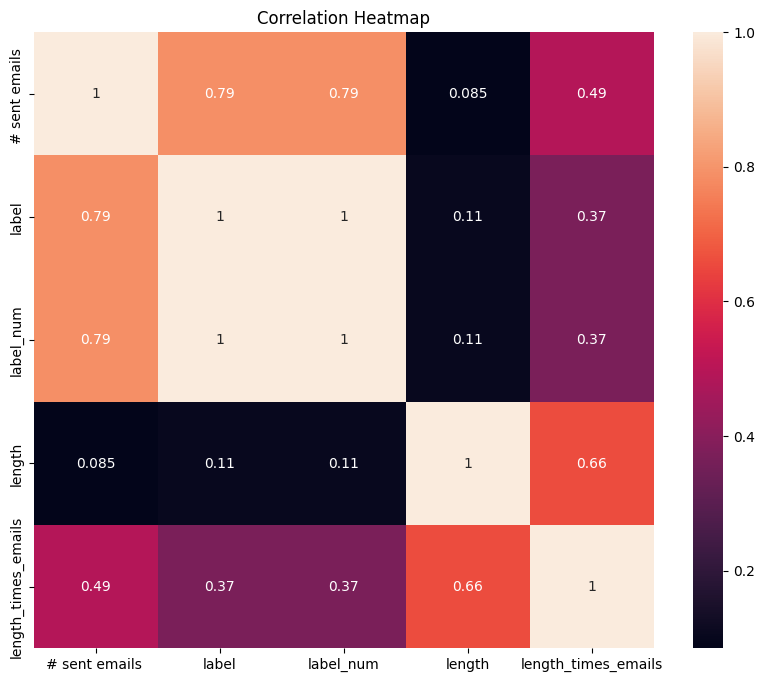

In [47]:
# Compute the correlation matrix
correlation_matrix = spamdata.drop(columns=['text']).corr()

# Print or use the correlation matrix as needed
print(correlation_matrix)
print("-" * 30)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [48]:
# # drop column length_times_emails
# spamdata.drop(columns=['length_times_emails, 'tokens','length'], inplace=True)
# spamdata.head()

# Feature Selection:

# 1) Filter

drob the labl_num colum

In [49]:
spamdata.drop("label_num", axis=1, inplace=True)

In [50]:
spamdata.columns

Index(['# sent emails ', 'label', 'text', 'length', 'length_times_emails'], dtype='object')

# 2) Chi-squared test

In [51]:
from scipy.stats import chi2_contingency

spamdata = pd.DataFrame(spamdata)

# Create a contingency table
contingency_table = pd.crosstab(spamdata['label'], spamdata['text'])

# Perform chi-square test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

# Print results
print("Chi-square statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

Chi-square statistic: 5171.0
P-value: 0.002016080402561642
Degrees of freedom: 4882
Expected frequencies:
 [[12.07193966  0.7101141   0.7101141  ...  0.7101141   0.7101141
   0.7101141 ]
 [ 4.92806034  0.2898859   0.2898859  ...  0.2898859   0.2898859
   0.2898859 ]]


3)  Mutual Information test

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import mutual_info_classif

# Initialize TfidfVectorizer
feature_extraction_mail = TfidfVectorizer(min_df=1, lowercase=True, stop_words='english')

# Assuming you have your original text data stored in a DataFrame named 'spamdata'
text_data = spamdata['text']

# Transform text data into numerical vectors
tfidf_matrix = feature_extraction_mail.fit_transform(text_data)
data = spamdata['# sent emails '].values.reshape(-1, 1)
# Assuming 'label_column' is the name of your label column indicating spam or not spam
label_column = spamdata['label']

# Compute mutual information between label column and transformed TF-IDF matrix
mutual_info = mutual_info_classif(tfidf_matrix, label_column)

# Analyze mutual information
print("Mutual Information Scores between text and label:", mutual_info)
# Compute mutual information between label column and transformed TF-IDF matrix
mutual_info1 = mutual_info_classif(data, label_column)

# Analyze mutual information
print("Mutual Information Scores between send emails and label:", mutual_info1)


Mutual Information Scores between text and label: [0.07518545 0.07879023 0.00139658 ... 0.00023951 0.00023951 0.00023951]
Mutual Information Scores between send emails and label: [0.39843229]


In [53]:
spamdata.dtypes

# sent emails            int64
label                    int64
text                    object
length                   int64
length_times_emails    float64
dtype: object

# MODELS & HYPERPARAMETERS

# 1) Logistic Regression



Accuracy for Logistic Regression on Training Set: 99.5164410058027
Accuracy for Logistic Regression in test: 0.9864734299516909
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       742
           1       0.96      0.99      0.98       293

    accuracy                           0.99      1035
   macro avg       0.98      0.99      0.98      1035
weighted avg       0.99      0.99      0.99      1035

Confusion Matrix:
[[731  11]
 [  3 290]]
....................


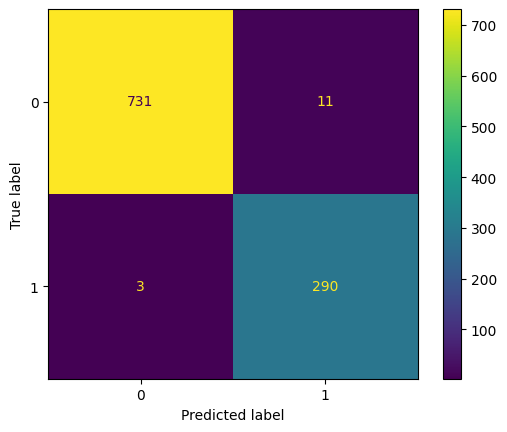

In [54]:
x = spamdata['text']
y = spamdata['label']
feature_extraction_mail = TfidfVectorizer(min_df=1, lowercase=True, stop_words='english')
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train = feature_extraction_mail.fit_transform(x_train)
logisticRegModel = LogisticRegression().fit(x_train, y_train)
y_pred_train = logisticRegModel.predict(x_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
x_test_feature = feature_extraction_mail.transform(x_test)
y_pred = logisticRegModel.predict(x_test_feature)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy for Logistic Regression on Training Set:", accuracy_train*100)

print("Accuracy for Logistic Regression in test:", accuracy)
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()
print('..'*10)

# 2) Decision Tree

Accuracy for Decision Tree on Training Set: 100.0
Accuracy for Decision Tree in text: 0.9478260869565217
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       742
           1       0.92      0.90      0.91       293

    accuracy                           0.95      1035
   macro avg       0.94      0.93      0.94      1035
weighted avg       0.95      0.95      0.95      1035

Confusion Matrix:


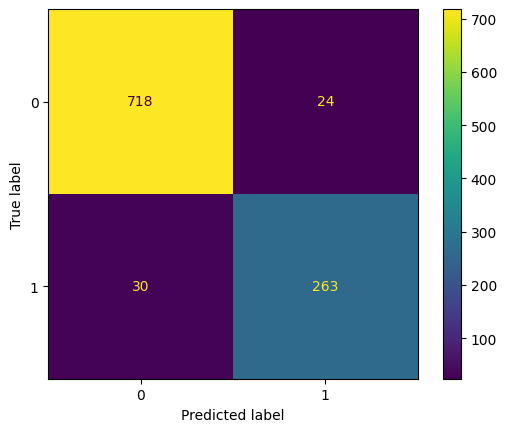

In [55]:
DecisionTreeModel = tree.DecisionTreeClassifier().fit(x_train, y_train)
y_pred_train = DecisionTreeModel.predict(x_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
y_pred = DecisionTreeModel.predict(x_test_feature)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy for Decision Tree on Training Set:", accuracy_train*100)
print("Accuracy for Decision Tree in text:", accuracy)
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()

3) # SVM & Hyper Tunning

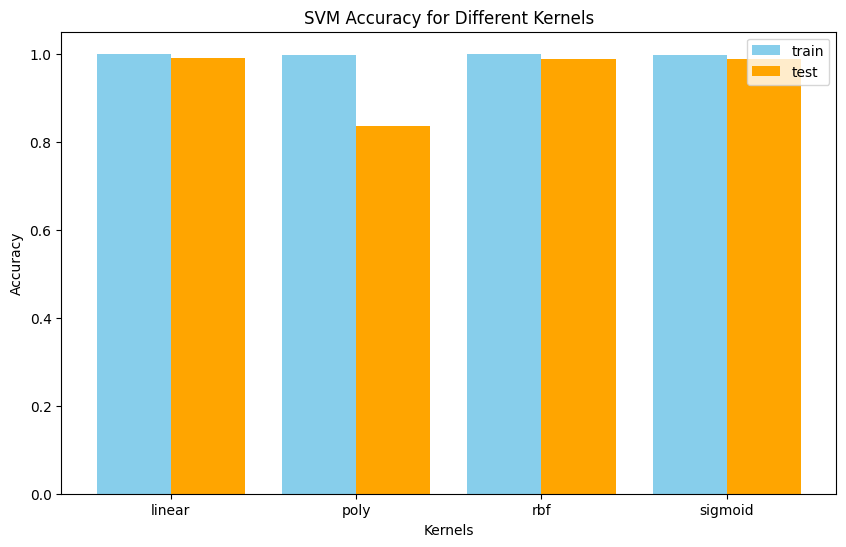

In [56]:


kernels = ["linear", "poly", "rbf", "sigmoid"]

accuracy_values_train = []
accuracy_values_test = []

# Assuming you have already defined x_train, x_test, y_train, and y_test

for kernel in kernels:
    svc = SVC(kernel=kernel)
    svc.fit(x_train, y_train)

    y_pred_train = svc.predict(x_train)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_values_train.append(accuracy_train)

    y_pred_test = svc.predict(x_test_feature)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    accuracy_values_test.append(accuracy_test)

plt.figure(figsize=(10, 6))
plt.bar(np.arange(len(kernels)) - 0.2, accuracy_values_train, width=0.4, label="train", color="skyblue")
plt.bar(np.arange(len(kernels)) + 0.2, accuracy_values_test, width=0.4, label="test", color="orange")

plt.xticks(np.arange(len(kernels)), kernels)
plt.xlabel('Kernels')
plt.ylabel('Accuracy')
plt.title('SVM Accuracy for Different Kernels')
plt.legend()
plt.show()




In [57]:
classefier=SVC(kernel="linear",random_state=0)
classefier.fit(x_train, y_train)
y_pred=classefier.predict(x_test_feature)
acc=accuracy_score(y_test,y_pred)
acc

0.9903381642512077

# 4) MULTINOMIAL

Training Accuracy: 96.1798839458414
Testing Accuracy: 92.56038647342996
Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       742
           1       1.00      0.74      0.85       293

    accuracy                           0.93      1035
   macro avg       0.95      0.87      0.90      1035
weighted avg       0.93      0.93      0.92      1035

Confusion Matrix:


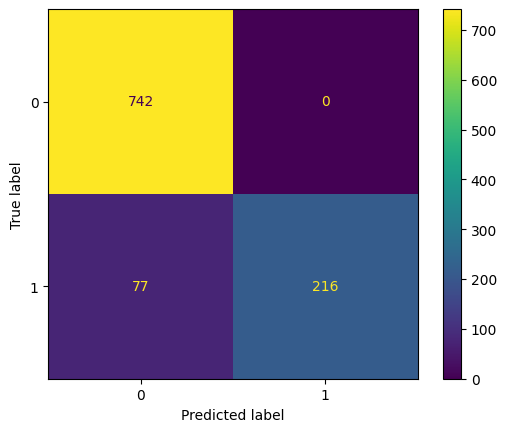

In [58]:
from sklearn.naive_bayes import MultinomialNB

classifier = MultinomialNB()
classifier.fit(x_train, y_train)
# Make predictions on the training set
y_train_pred = classifier.predict(x_train)
# Evaluate the classifier on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy*100)
# Make predictions on the testing set
y_test_pred = classifier.predict(x_test_feature)
# Evaluate the classifier on the testing set
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Testing Accuracy:", test_accuracy*100)
# Print classification report for the testing set
print("Classification Report:")
print(classification_report(y_test, y_test_pred))
print("Confusion Matrix:")
ConfusionMatrixDisplay(confusion_matrix(y_test,y_test_pred)).plot()

# 5) Random Forest

Training Accuracy: 100.0
Testing Accuracy: 98.06763285024155
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       742
           1       0.95      0.98      0.97       293

    accuracy                           0.98      1035
   macro avg       0.97      0.98      0.98      1035
weighted avg       0.98      0.98      0.98      1035

Confusion Matrix:


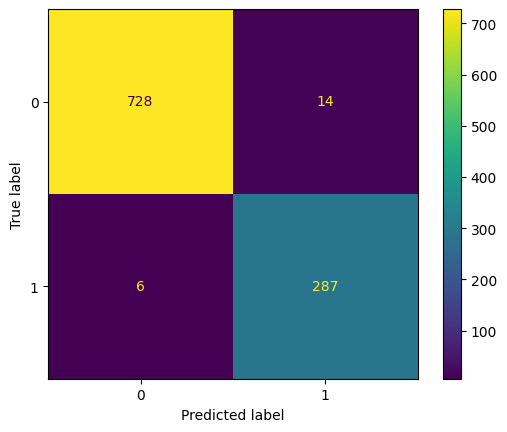

In [59]:
from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, classification_report

# Create a random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(x_train, y_train)

# Make predictions on the training data
y_train_pred = rf_classifier.predict(x_train)

train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy*100)

# Make predictions on the testing data
y_test_pred = rf_classifier.predict(x_test_feature)

test_accuracy = accuracy_score(y_test, y_test_pred)
print("Testing Accuracy:", test_accuracy*100)

# Print classification report for additional evaluation metrics
print(classification_report(y_test, y_test_pred))
print("Confusion Matrix:")
ConfusionMatrixDisplay(confusion_matrix(y_test,y_test_pred)).plot()


# 6) KNN

Training Accuracy: 99.97582205029013
Testing Accuracy: 75.26570048309179
              precision    recall  f1-score   support

           0       1.00      0.65      0.79       742
           1       0.53      1.00      0.70       293

    accuracy                           0.75      1035
   macro avg       0.77      0.83      0.74      1035
weighted avg       0.87      0.75      0.76      1035

Confusion Matrix:


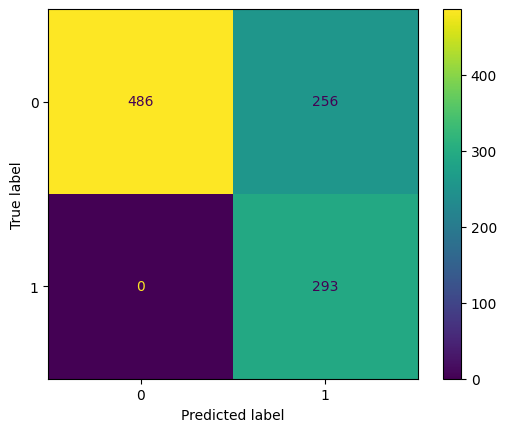

In [67]:

KNN=KNeighborsClassifier(n_neighbors=2)
KNN.fit(x_train,y_train)
y_train_pred=KNN.predict(x_train)
y_test_pred=KNN.predict(x_test_feature)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy*100)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Testing Accuracy:", test_accuracy*100)
# Print classification report for additional evaluation metrics
print(classification_report(y_test, y_test_pred))
print("Confusion Matrix:")
ConfusionMatrixDisplay(confusion_matrix(y_test,y_test_pred)).plot()



# 7) Naive Bayes

Training Accuracy: 98.76692456479691
Testing Accuracy: 94.10628019323671
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       742
           1       0.92      0.87      0.89       293

    accuracy                           0.94      1035
   macro avg       0.93      0.92      0.93      1035
weighted avg       0.94      0.94      0.94      1035

Confusion Matrix:


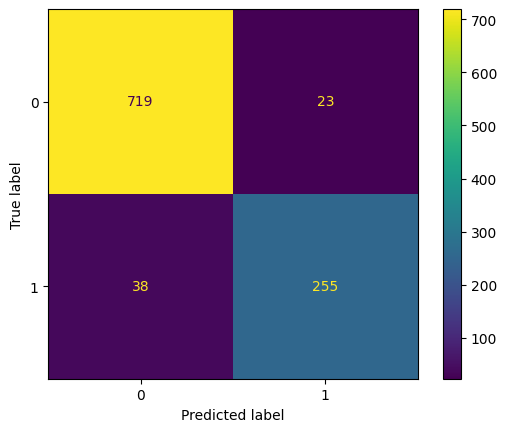

In [68]:

model=GaussianNB()
dense_X_train = x_train.toarray()
model.fit(dense_X_train, y_train)
dense_X_test = x_test_feature.toarray()
y_train_pred=model.predict(dense_X_train )
y_test_pred=model.predict(dense_X_test )
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy*100)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Testing Accuracy:", test_accuracy*100)
# Print classification report for additional evaluation metrics
print(classification_report(y_test, y_test_pred))
print("Confusion Matrix:")
ConfusionMatrixDisplay(confusion_matrix(y_test,y_test_pred)).plot()


Deployment

In [62]:
import joblib
file='spam_mail'
joblib.dump(logisticRegModel,"spam_mail")
model=joblib.load(open("spam_mail",'rb'))


# 😊 Practice Practice Practice 😊

#train the model on tokens column and display accuracy in train & test by logistic regression & svm & decision tree


In [63]:
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,ConfusionMatrixDisplay
# x = spamdata['tokens']
# y = spamdata['label']
# feature_extraction_mail = TfidfVectorizer(min_df=1, lowercase=True, stop_words='english')
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# x_train = feature_extraction_mail.fit_transform(x_train)
# logisticRegModel = LogisticRegression().fit(x_train, y_train)
# y_pred1_train = logisticRegModel.predict(x_train)
# accuracy1_train = accuracy_score(y_train, y_pred1_train)
# x_test_feature = feature_extraction_mail.transform(x_test)
# y_pred1 = logisticRegModel.predict(x_test_feature)
# DecisionTreeModel = tree.DecisionTreeClassifier().fit(x_train, y_train)
# y_pred2_train = DecisionTreeModel.predict(x_train)
# accuracy2_train = accuracy_score(y_train, y_pred2_train)
# y_pred2 = DecisionTreeModel.predict(x_test_feature)
# svmModel = svm.SVC(kernel='linear').fit(x_train, y_train)
# y_pred3_train = svmModel.predict(x_train)
# accuracy3_train = accuracy_score(y_train, y_pred3_train)
# y_pred3 = svmModel.predict(x_test_feature)
# accuracy1 = accuracy_score(y_test, y_pred1)
# accuracy2 = accuracy_score(y_test, y_pred2)
# accuracy3 = accuracy_score(y_test, y_pred3)
# # Print the accuracies on the training set
# print("Accuracy for Logistic Regression on Training Set:", accuracy1_train*100)
# print("Accuracy for Decision Tree on Training Set:", accuracy2_train*100)
# print("Accuracy for SVM on Training Set:", accuracy3_train*100)
# print('..'*20)
# # Print the accuracies on the testing set
# print("Accuracy for Logistic Regression in test:", accuracy1*100)

# print("Accuracy for Decision Tree in text:", accuracy2*100)

# print("Accuracy for SVM in test:", accuracy3*100)

# print("Accuracy for Decision Tree in text:", accuracy2*100)

# print("Accuracy for SVM in test:", accuracy3*100)
################################################################################
# # Accuracy for Logistic Regression on Training Set: 99.54061895551257
# # Accuracy for Decision Tree on Training Set: 100.0
# # Accuracy for SVM on Training Set: 99.87911025145067
# # ........................................
# # Accuracy for Logistic Regression in test: 98.64734299516908
# # Accuracy for Decision Tree in text: 94.4927536231884
# # Accuracy for SVM in test: 99.1304347826087


#train the model on sent emails as it has strong corr and display accuracy in test by logistic regression


In [64]:
# # from sklearn.model_selection import train_test_split
# # from sklearn.linear_model import LogisticRegression
# # from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
# x = spamdata[['# sent emails ']]
# y = spamdata['label']

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# # Initialize and fit the logistic regression model
# logistic = LogisticRegression(random_state=0)
# logistic.fit(X_train, y_train)

# # Predict the labels for the training and test sets
# y_train_pred = logistic.predict(X_train)
# y_test_pred = logistic.predict(X_test)

# # Calculate accuracy on training and test sets
# train_accuracy = accuracy_score(y_train, y_train_pred)
# test_accuracy = accuracy_score(y_test, y_test_pred)

# # Print classification report for test set
# cr = classification_report(y_test, y_test_pred)
# print("Classification Report for Testing Data:")
# print(cr)
# print("Accuracy in training:", train_accuracy)
# print("Accuracy in testing:", test_accuracy)
################################################################################
# # in train & test accuracy 100%

#train the model on sent emails and length_times_emails and display accuracy in test by logistic regression


In [65]:
# x = spamdata[['# sent emails ', 'length_times_emails']]
# y = spamdata['label']

In [66]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size =0.2, random_state = 0)
# logistic = LogisticRegression(random_state = 0)
# logistic.fit(X_train, y_train)
# y_pred = logistic.predict(X_test)
# cr=classification_report(y_test, y_pred)
# print(cr)
# print("accuracy in testing:")
# accuracy_score(y_test, y_pred)
################################################################################
#####accuracy in testing:
#0.4599033816425121